TASK 1-4


A - - - -
- P - - -
- X - - -
- - - X G
- - - - -

Average reward for alpha=0.2, gamma=0.9: 29.411


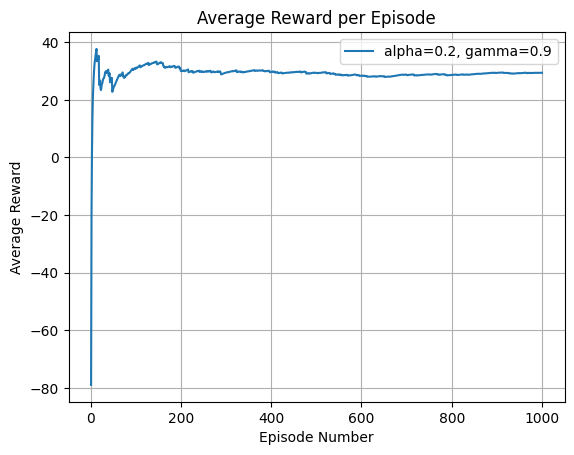

In [90]:
import numpy as np
import matplotlib.pyplot as plt

class WarehouseEnvironment:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.state = (0, 0)  # Initial state
        self.goal_state = (3, 4)  # goal state
        self.actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # possible actions - down, right, up, left
        self.obstacles = [(2, 1), (3, 3)]  # obstacle positions
        self.package_location = (1, 1)  # package location

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
      if action in self.actions:
          next_state = (self.state[0] + action[0], self.state[1] + action[1])
          next_state = (max(0, min(next_state[0], self.grid_size - 1)),
                        max(0, min(next_state[1], self.grid_size - 1)))  # ensure state is within bounds

          # check if agent is trying to pick up package
          if next_state == self.package_location and self.package_location != (-1, -1):
              # agent picks up the package
              self.package_location = (-1, -1)  # Package is picked up

          elif next_state == self.goal_state and self.package_location == (-1, -1):

              # agent drops off the package
              self.package_location = self.goal_state  # package is dropped off

          elif next_state == self.goal_state and self.package_location != (-1, -1):

              # agent tries to drop off package in the wrong location
              reward = -10
              return self.state, reward, False  # return the current state with the penalty and mark episode as not done

          if next_state not in self.obstacles:
              self.state = next_state
          else:
              reward = -5  # penalty if agent crosses an obstacle
      else:
          reward = -5  # penalty if the action is invalid

      done = self.state == self.goal_state and self.package_location == self.goal_state
      reward = 50 if done else (reward if 'reward' in locals() else -1)  # reward 50 for reaching the goal with the package, -1 otherwise

      return self.state, reward, done




# print initial visual representation of grid
    def visualize_grid(self):

        grid = [['-' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        grid[self.state[0]][self.state[1]] = 'A'  # agent
        grid[self.goal_state[0]][self.goal_state[1]] = 'G'  # goal

        grid[self.package_location[0]][self.package_location[1]] = 'P'  # package

        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = 'X'  # obstacle

        for row in grid:
            print(' '.join(row))
        print()


# define q learning algorithm
def q_learning(env, num_episodes, alpha, gamma, epsilon):
    q_table = np.zeros((env.grid_size, env.grid_size, len(env.actions)))
    total_rewards = []

    state = env.reset()

    for episode in range(num_episodes):
        done = False
        total_reward = 0

        while not done:
            if np.random.uniform(0, 1) < epsilon:  # epsilon-greedy policy
                action = np.random.randint(0, len(env.actions))
            else:
                action = np.argmax(q_table[state[0], state[1]])

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            state = next_state

        total_rewards.append(total_reward)

    return total_rewards

# environment parameters
grid_size = 5
num_episodes = 1000
alphas = [0.2]
gammas = [0.9]
epsilon = 0.9

# print initial state of the grid before trying different combinations
env = WarehouseEnvironment(grid_size)
env.visualize_grid()

for alpha in alphas:
    for gamma in gammas:
        total_rewards = q_learning(env, num_episodes, alpha, gamma, epsilon)

        # calculate average reward for each episode
        average_rewards = [np.mean(total_rewards[:i+1]) for i in range(num_episodes)]
        average_reward = np.mean(total_rewards)  # Calculate overall average reward

        print(f'Average reward for alpha={alpha}, gamma={gamma}: {average_reward}')

        # Plot
        plt.plot(range(1, num_episodes+1), average_rewards, label=f'alpha={alpha}, gamma={gamma}')

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.legend()
plt.grid(True)
plt.show()


TASK 5


A - - - -
- P - - -
- X - - -
- - - X G
- - - - -



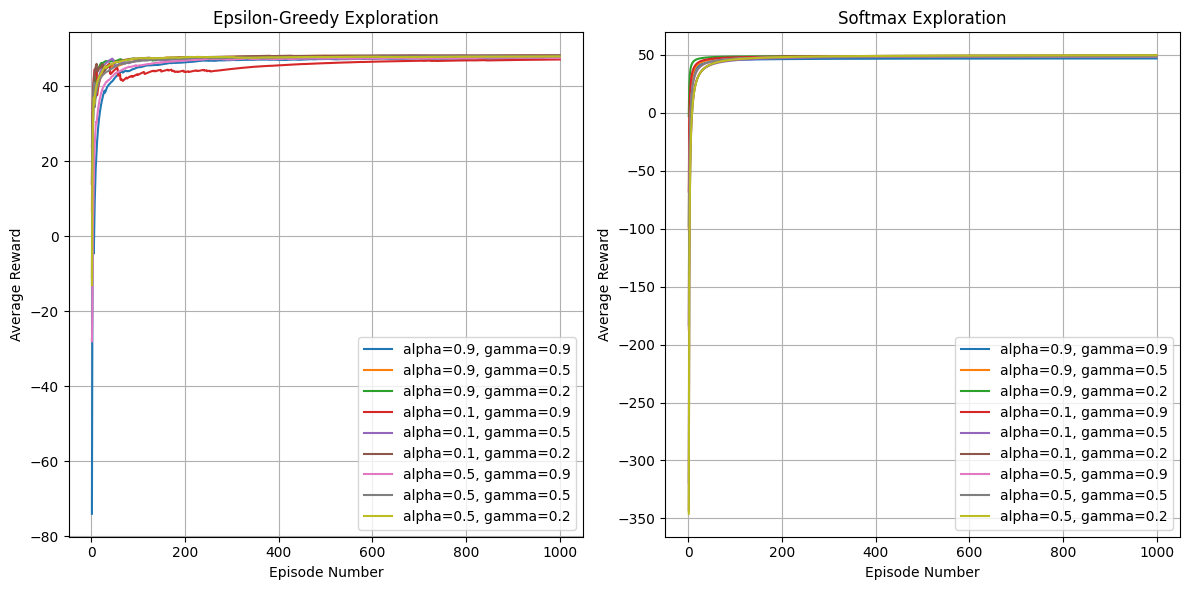

Best Hyperparameters for Epsilon-Greedy Exploration:
Alpha: 0.1, Gamma: 0.2
Best Hyperparameters for Softmax Exploration:
Alpha: 0.1, Gamma: 0.2


In [99]:
import numpy as np
import matplotlib.pyplot as plt

class WarehouseEnvironment:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.state = (0, 0)
        self.goal_state = (3, 4)
        self.actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
        self.obstacles = [(2, 1), (3, 3)]
        self.package_location = (1, 1)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        if action in self.actions:
            next_state = (self.state[0] + action[0], self.state[1] + action[1])
            next_state = (max(0, min(next_state[0], self.grid_size - 1)),
                          max(0, min(next_state[1], self.grid_size - 1)))

            if next_state == self.package_location and self.package_location != (-1, -1):
                self.package_location = (-1, -1)

            elif next_state == self.goal_state and self.package_location == (-1, -1):
                self.package_location = self.goal_state

            elif next_state == self.goal_state and self.package_location != (-1, -1):
                reward = -10
                return self.state, reward, False

            if next_state not in self.obstacles:
                self.state = next_state
            else:
                reward = -5
        else:
            reward = -5

        done = self.state == self.goal_state and self.package_location == self.goal_state
        reward = 50 if done else (reward if 'reward' in locals() else -1)

        return self.state, reward, done

    def visualize_grid(self):
        grid = [['-' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        grid[self.state[0]][self.state[1]] = 'A'
        grid[self.goal_state[0]][self.goal_state[1]] = 'G'

        grid[self.package_location[0]][self.package_location[1]] = 'P'

        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = 'X'

        for row in grid:
            print(' '.join(row))
        print()

def epsilon_greedy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

def softmax(q_values, temperature=1.0):
    probabilities = np.exp(q_values / temperature)
    probabilities /= np.sum(probabilities)
    return np.random.choice(len(q_values), p=probabilities)

def q_learning(env, num_episodes, alpha, gamma, exploration_strategy, epsilon=None, temperature=None):
    q_table = np.zeros((env.grid_size, env.grid_size, len(env.actions)))
    total_rewards = []

    state = env.reset()

    for episode in range(num_episodes):
        done = False
        total_reward = 0

        while not done:
            if exploration_strategy == 'epsilon-greedy':
                action = epsilon_greedy(q_table[state[0], state[1]], epsilon)
            elif exploration_strategy == 'softmax':
                action = softmax(q_table[state[0], state[1]], temperature)

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            state = next_state

        total_rewards.append(total_reward)

    return total_rewards

# environment parameters
grid_size = 5
num_episodes = 1000
alphas = [0.9, 0.1, 0.5]
gammas = [0.9, 0.5, 0.2]
epsilon = 0.2
temperature = 1.0  # temperature for softmax exploration strategy

env = WarehouseEnvironment(grid_size)
env.visualize_grid()

plt.figure(figsize=(12, 6))

# plot for epsilon-greedy
plt.subplot(1, 2, 1)
best_avg_reward_epsilon = float('-inf')
best_hyperparams_epsilon = None
for alpha in alphas:
    for gamma in gammas:
        total_rewards = q_learning(env, num_episodes, alpha, gamma, 'epsilon-greedy', epsilon=epsilon)
        average_rewards = [np.mean(total_rewards[:i+1]) for i in range(num_episodes)]
        avg_reward = np.mean(total_rewards)
        if avg_reward > best_avg_reward_epsilon:
            best_avg_reward_epsilon = avg_reward
            best_hyperparams_epsilon = (alpha, gamma)
        plt.plot(range(1, num_episodes+1), average_rewards, label=f'alpha={alpha}, gamma={gamma}')
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Exploration')
plt.legend()
plt.grid(True)

# plot for softmax
plt.subplot(1, 2, 2)
best_avg_reward_softmax = float('-inf')
best_hyperparams_softmax = None
for alpha in alphas:
    for gamma in gammas:
        total_rewards = q_learning(env, num_episodes, alpha, gamma, 'softmax', temperature=temperature)
        average_rewards = [np.mean(total_rewards[:i+1]) for i in range(num_episodes)]
        avg_reward = np.mean(total_rewards)
        if avg_reward > best_avg_reward_softmax:
            best_avg_reward_softmax = avg_reward
            best_hyperparams_softmax = (alpha, gamma)
        plt.plot(range(1, num_episodes+1), average_rewards, label=f'alpha={alpha}, gamma={gamma}')
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Softmax Exploration')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Best Hyperparameters for Epsilon-Greedy Exploration:")
print(f"Alpha: {best_hyperparams_epsilon[0]}, Gamma: {best_hyperparams_epsilon[1]}")
print("Best Hyperparameters for Softmax Exploration:")
print(f"Alpha: {best_hyperparams_softmax[0]}, Gamma: {best_hyperparams_softmax[1]}")


TASK 5 with different epsilon


A - - - -
- P - - -
- X - - -
- - - X G
- - - - -



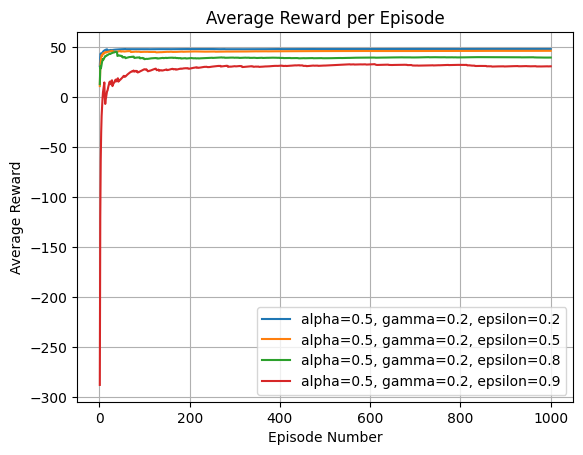

Best Hyperparameters:
Alpha: 0.5
Gamma: 0.2
Epsilon: 0.2
Average Reward: 48.119


In [84]:
c

A - - - -
- P - - -
- X - - -
- - - X G
- - - - -



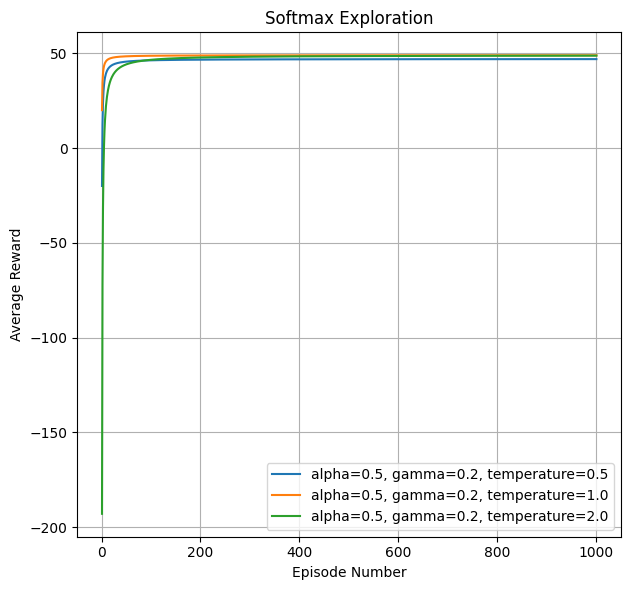

Best Hyperparameters for Softmax Exploration:
Alpha: 0.5, Gamma: 0.2, Temperature: 1.0


In [81]:
# run with best hyperparameters

import numpy as np
import matplotlib.pyplot as plt

class WarehouseEnvironment:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.state = (0, 0)  # Initial state
        self.goal_state = (3, 4)  # Goal state
        self.actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # Possible actions (down, right, up, left)
        self.obstacles = [(2, 1), (3, 3)]  # Obstacle positions
        self.package_location = (1, 1)  # Package location

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
      if action in self.actions:
          next_state = (self.state[0] + action[0], self.state[1] + action[1])
          next_state = (max(0, min(next_state[0], self.grid_size - 1)),
                        max(0, min(next_state[1], self.grid_size - 1)))  # ensure state is within bounds

          # check if agent is trying to pick up package
          if next_state == self.package_location and self.package_location != (-1, -1):
              # agent picks up the package
              self.package_location = (-1, -1)  # Package is picked up

          elif next_state == self.goal_state and self.package_location == (-1, -1):

              # agent drops off the package
              self.package_location = self.goal_state  # package is dropped off

          elif next_state == self.goal_state and self.package_location != (-1, -1):

              # agent tries to drop off package in the wrong location
              reward = -10
              return self.state, reward, False  # return the current state with the penalty and mark episode as not done

          if next_state not in self.obstacles:
              self.state = next_state
          else:
              reward = -5  # penalty if agent crosses an obstacle
      else:
          reward = -5  # penalty if the action is invalid

      done = self.state == self.goal_state and self.package_location == self.goal_state
      reward = 50 if done else (reward if 'reward' in locals() else -1)  # reward 50 for reaching the goal with the package, -1 otherwise

      return self.state, reward, done

    def visualize_grid(self):
        grid = [['-' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        grid[self.state[0]][self.state[1]] = 'A'  # Agent
        grid[self.goal_state[0]][self.goal_state[1]] = 'G'  # Goal

        grid[self.package_location[0]][self.package_location[1]] = 'P'  # Package

        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = 'X'  # Obstacle

        for row in grid:
            print(' '.join(row))
        print()

def epsilon_greedy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

def softmax(q_values, temperature=1.0):
    probabilities = np.exp(q_values / temperature)
    probabilities /= np.sum(probabilities)
    return np.random.choice(len(q_values), p=probabilities)

def q_learning(env, num_episodes, alpha, gamma, exploration_strategy, epsilon=None, temperature=None):
    q_table = np.zeros((env.grid_size, env.grid_size, len(env.actions)))
    total_rewards = []

    state = env.reset()

    for episode in range(num_episodes):
        done = False
        total_reward = 0

        while not done:
            if exploration_strategy == 'epsilon-greedy':
                action = epsilon_greedy(q_table[state[0], state[1]], epsilon)
            elif exploration_strategy == 'softmax':
                action = softmax(q_table[state[0], state[1]], temperature)

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            state = next_state

        total_rewards.append(total_reward)

    return total_rewards

# environment parameters

grid_size = 5
num_episodes = 1000
alphas = [0.5]
gammas = [0.2]
temperatures = [0.5, 1.0, 2.0]  # different temperature values for softmax exploration

env = WarehouseEnvironment(grid_size)
env.visualize_grid()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
best_avg_reward_softmax = float('-inf')
best_hyperparams_softmax = None
for alpha in alphas:
    for gamma in gammas:
        for temperature in temperatures:
            total_rewards = q_learning(env, num_episodes, alpha, gamma, 'softmax', temperature=temperature)
            average_rewards = [np.mean(total_rewards[:i+1]) for i in range(num_episodes)]
            avg_reward = np.mean(total_rewards)
            if avg_reward > best_avg_reward_softmax:
                best_avg_reward_softmax = avg_reward
                best_hyperparams_softmax = (alpha, gamma, temperature)
            plt.plot(range(1, num_episodes+1), average_rewards, label=f'alpha={alpha}, gamma={gamma}, temperature={temperature}')

plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Softmax Exploration')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Best Hyperparameters for Softmax Exploration:")
print(f"Alpha: {best_hyperparams_softmax[0]}, Gamma: {best_hyperparams_softmax[1]}, Temperature: {best_hyperparams_softmax[2]}")


A - - - -
- P - - -
- X - - -
- - - X G
- - - - -



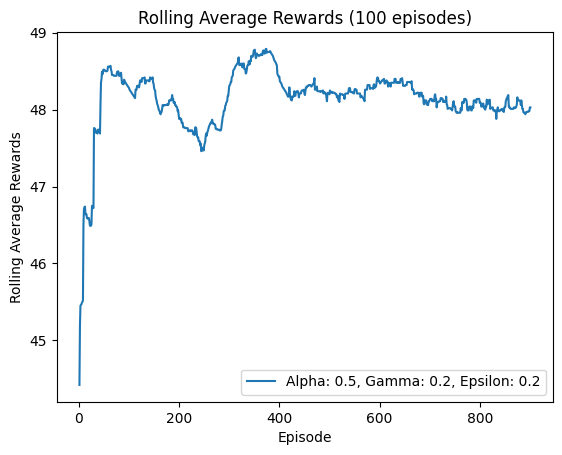

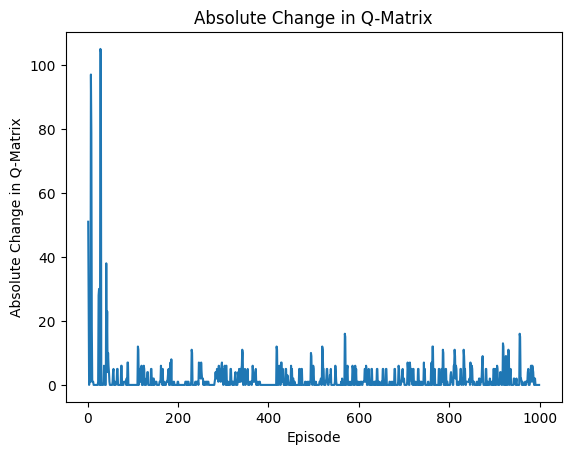

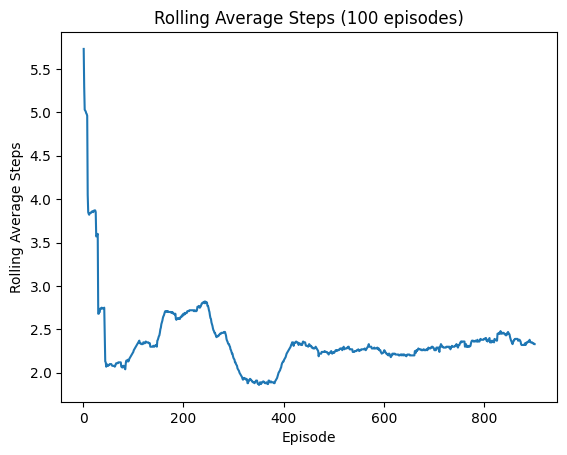

Best Hyperparameters:
Alpha: 0.5
Gamma: 0.2
Epsilon: 0.2
Average Reward: 47.811


In [97]:
import numpy as np
import matplotlib.pyplot as plt

class WarehouseEnvironment:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.state = (0, 0)  # Initial state
        self.goal_state = (3, 4)  # Goal state
        self.actions = [(1, 0), (0, 1), (-1, 0), (0, -1)]  # Possible actions (down, right, up, left)
        self.obstacles = [(2, 1), (3, 3)]  # Obstacle positions
        self.package_location = (1, 1)  # Package location

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
    if action in self.actions:
        next_state = (self.state[0] + action[0], self.state[1] + action[1])
        next_state = (max(0, min(next_state[0], self.grid_size - 1)),
                      max(0, min(next_state[1], self.grid_size - 1)))  # ensure state is within bounds

        # check if agent is trying to pick up package
        if next_state == self.package_location and self.package_location != (-1, -1):
            # agent picks up the package
            self.package_location = (-1, -1)  # Package is picked up

        elif next_state == self.goal_state and self.package_location == (-1, -1):

            # agent drops off the package
            self.package_location = self.goal_state  # package is dropped off

        elif next_state == self.goal_state and self.package_location != (-1, -1):

            # agent tries to drop off package in the wrong location
            reward = -10
            return self.state, reward, False  # return the current state with the penalty and mark episode as not done

        if next_state not in self.obstacles:
            self.state = next_state
        else:
            reward = -5  # penalty if agent crosses an obstacle
    else:
        reward = -5  # penalty if the action is invalid

    done = self.state == self.goal_state and self.package_location == self.goal_state
    reward = 50 if done else (reward if 'reward' in locals() else -1)  # reward 50 for reaching the goal with the package, -1 otherwise

    return self.state, reward, done

    def visualize_grid(self):
        grid = [['-' for _ in range(self.grid_size)] for _ in range(self.grid_size)]
        grid[self.state[0]][self.state[1]] = 'A'  # Agent
        grid[self.goal_state[0]][self.goal_state[1]] = 'G'  # Goal

        grid[self.package_location[0]][self.package_location[1]] = 'P'  # Package

        for obstacle in self.obstacles:
            grid[obstacle[0]][obstacle[1]] = 'X'  # Obstacle

        for row in grid:
            print(' '.join(row))
        print()

def epsilon_greedy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

def q_learning(env, num_episodes, alpha, gamma, epsilon):
    q_table = np.zeros((env.grid_size, env.grid_size, len(env.actions)))
    total_rewards = []
    total_steps = []

    state = env.reset()

    for episode in range(num_episodes):
        done = False
        total_reward = 0
        steps = 0

        while not done:
            action = epsilon_greedy(q_table[state[0], state[1]], epsilon)

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward
            steps += 1
            q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
            state = next_state

        total_rewards.append(total_reward)
        total_steps.append(steps)

    return total_rewards, total_steps


# environment parameters
grid_size = 5
num_episodes = 1000
alphas = [0.5]
gammas = [0.2]
epsilons = [0.2]

best_alpha = None
best_gamma = None
best_epsilon = None
best_average_reward = float('-inf')

env = WarehouseEnvironment(grid_size)
env.visualize_grid()

# train Q-learning agent for different combinations
for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            total_rewards, total_steps = q_learning(env, num_episodes, alpha, gamma, epsilon)

            average_rewards = [np.mean(total_rewards[max(0, i-99):i+1]) for i in range(num_episodes)]
            average_reward = np.mean(total_rewards)

            rolling_average_rewards = np.convolve(total_rewards, np.ones(100), 'valid') / 100

            absolute_change_q_matrix = np.abs(np.diff(total_rewards))

            if average_reward > best_average_reward:

                best_average_reward = average_reward
                best_alpha = alpha
                best_gamma = gamma
                best_epsilon = epsilon

            plt.plot(range(1, len(rolling_average_rewards) + 1), rolling_average_rewards, label=f'Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}')
            plt.xlabel('Episode')
            plt.ylabel('Rolling Average Rewards')
            plt.title('Rolling Average Rewards (100 episodes)')
            plt.legend()
            plt.show()

            plt.plot(range(1, len(absolute_change_q_matrix) + 1), absolute_change_q_matrix)
            plt.xlabel('Episode')
            plt.ylabel('Absolute Change in Q-Matrix')
            plt.title('Absolute Change in Q-Matrix')
            plt.show()

            rolling_average_steps = np.convolve(total_steps, np.ones(100), 'valid') / 100
            plt.plot(range(1, len(rolling_average_steps) + 1), rolling_average_steps)
            plt.xlabel('Episode')
            plt.ylabel('Rolling Average Steps')
            plt.title('Rolling Average Steps (100 episodes)')
            plt.show()

print("Best Hyperparameters:")
print(f"Alpha: {best_alpha}")
print(f"Gamma: {best_gamma}")
print(f"Epsilon: {best_epsilon}")
print(f"Average Reward: {best_average_reward}")
